In [1]:
import numpy as np
import pandas as pd

In [3]:
probe_raw = pd.read_csv('LAHarborJune12018', 
                  names = ["PROBE_ID","SAMPLE_DATE", "LAT", "LONG", "HEADING",\
                           "SPEED","PROBE_DATA_PROVIDER","X","Y", "LOCAL_TIME"])


In [4]:
probe_raw.head()

,PROBE_ID,SAMPLE_DATE,LAT,LONG,HEADING,SPEED,PROBE_DATA_PROVIDER,X,Y,LOCAL_TIME
0,2869bff918e442c9b9be9d079dede349,2018-06-01 00:57:49,34.059920,-118.445030,183.0,4.00000,CONSUMER21,366643.071142,3.769742e+06,2018-05-31 17:57:49 -0700
1,24046157,2018-06-01 00:57:59,33.808750,-118.298480,182.0,73.00000,FLEET51,379816.173355,3.741709e+06,2018-05-31 17:57:59 -0700
2,2DD764B9-0E69-4EEC-9A91-8A36236586C4,2018-06-01 00:59:02,33.931794,-117.961762,90.0,51.00000,CONSUMER14,411110.854783,3.755010e+06,2018-05-31 17:59:02 -0700
3,19727088,2018-06-01 00:58:35,34.076356,-118.366926,359.0,33.00000,FLEET51,373875.915588,3.771465e+06,2018-05-31 17:58:35 -0700
4,0C03FB6E00,2018-06-01 00:58:05,34.003930,-118.238850,123.0,17.70274,FLEET41,385596.790831,3.763283e+06,2018-05-31 17:58:05 -0700


In [5]:
probe_raw.shape

(13027090, 10)

In [6]:
p1 = (33.868333,-117.988154)
p2 = (33.868333,-118.323000)
p3 = (33.868333,-117.988154)
p4 = (33.645447,-118.323000)


In [7]:
def crop_region(probe_raw, p1, p2, p3, p4):
    
    sample_df_out = probe_raw[(probe_raw['LAT'] > p4[0]) &
                    (probe_raw['LAT'] < p1[0]) &
                    (probe_raw['LONG'] < p3[1]) &
                    (probe_raw['LONG'] > p4[1])]
    
    return sample_df_out

In [8]:
crop_probe = crop_region(probe_raw, p1, p2, p3, p4)


In [9]:
crop_probe.shape


(1989370, 10)

In [10]:
crop_probe.head()

,PROBE_ID,SAMPLE_DATE,LAT,LONG,HEADING,SPEED,PROBE_DATA_PROVIDER,X,Y,LOCAL_TIME
1,24046157,2018-06-01 00:57:59,33.808750,-118.298480,182.0,73.00000,FLEET51,379816.173355,3.741709e+06,2018-05-31 17:57:59 -0700
13,4644114056,2018-06-01 00:58:50,33.790882,-118.140198,348.0,0.00000,FLEET44,394445.225261,3.739554e+06,2018-05-31 17:58:50 -0700
18,5c3d03bf4888e7c27bb1da53f4b6b4e2,2018-06-01 00:59:22,33.811665,-118.176650,89.0,0.00000,FLEET05,391096.765695,3.741896e+06,2018-05-31 17:59:22 -0700
21,0C01B72E00,2018-06-01 00:59:20,33.812690,-118.139160,3.0,41.84284,FLEET41,394568.037470,3.741971e+06,2018-05-31 17:59:20 -0700
30,0C03CB7B00,2018-06-01 00:59:16,33.715950,-118.006730,178.0,8.04670,FLEET41,406720.503841,3.731117e+06,2018-05-31 17:59:16 -0700


In [11]:
import matplotlib.pyplot as plt

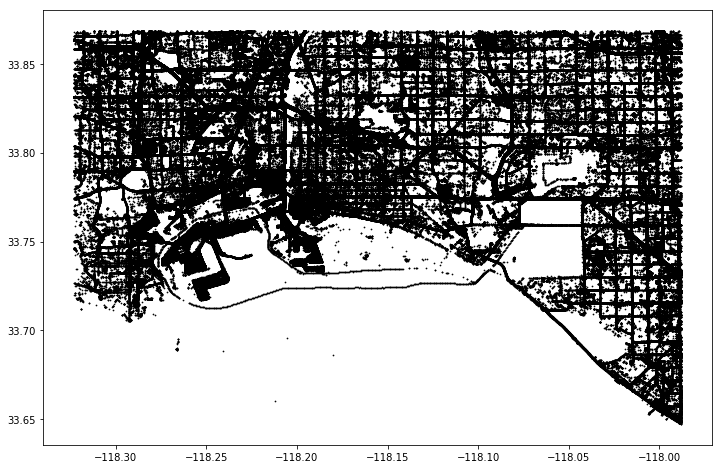

In [13]:
plt.figure(figsize = (12,8))
plt.scatter(crop_probe.LONG, crop_probe.LAT, s = 0.5, c = 'k')
plt.show()

In [ ]:
crop_probe.to_csv('crop_data.csv')